In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.special import wofz


In [2]:
# df = pd.read_csv("2024-02-07_18h45m11s-RawSignal.csv",header = None) ### Good event file
# df = pd.read_csv("2024-02-08_18h10m52s-RawSignal.csv",header = None)

# df = df.drop(columns=[0])
x = np.linspace(210,216,500)

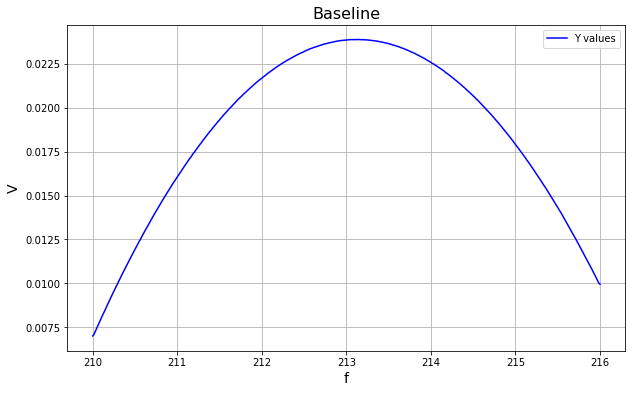

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(x, df.iloc[2], linestyle='-', color='b', label='Y values')
plt.title('Baseline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()

In [71]:
degree = 2
coefficients = np.polyfit(x, df.iloc[2], degree)
p = np.poly1d(coefficients)


print("Fitted polynomial equation:")
print(p)

Fitted polynomial equation:
           2
-0.001717 x + 0.732 x - 77.99


In [2]:
"Fitted polynomial equation: -0.001717 x**2 + 0.732 x - 77.99"

'Fitted polynomial equation: -0.001717 x**2 + 0.732 x - 77.99'

In [3]:
def Voigt(x, amp, s, g, x0):
    z = (x - x0 + 1j * g) / (s * np.sqrt(2.0))
    v = wofz(z)  # Faddeeva function for Voigt profile
    out = amp * (np.real(v) / (s * np.sqrt(2 * np.pi)))
    return out

def FrequencyBound(f):
    fit_start_bin, fit_end_bin = 0, 500

    bin_to_freq = 0.0015287  # MHz per bin
    start_freq = f  

    x_full_bins = np.arange(500)  
    x_full_freq = start_freq + x_full_bins * bin_to_freq 

    x_bins = x_full_bins[fit_start_bin:fit_end_bin+1]
    x_freq = x_full_freq[fit_start_bin:fit_end_bin+1]

    return x_full_freq,  x_full_freq[0], x_full_freq[-1]

In [61]:
exp_fact = np.random.uniform(.0001,.001)

sig = 0.01 + np.random.uniform(-0.009, 0.1)       
gam = 0.01 + np.random.uniform(-0.009, 0.1)         
amp = .01 + np.random.uniform(-0.0019, 0.05)
center = 213 + np.random.uniform(-.1, .1)

# x, lower_bound, upper_bound = FrequencyBound(212.6)
x = np.linspace(210,216,500)

signal = Voigt(x, amp, sig, gam, center)

baseline = (-0.001717*x**2 + 0.732*x - 77.99)## This is a fitted baseline equation

combined_signal = signal + baseline

offset = np.array([x - min(combined_signal) for x in combined_signal])

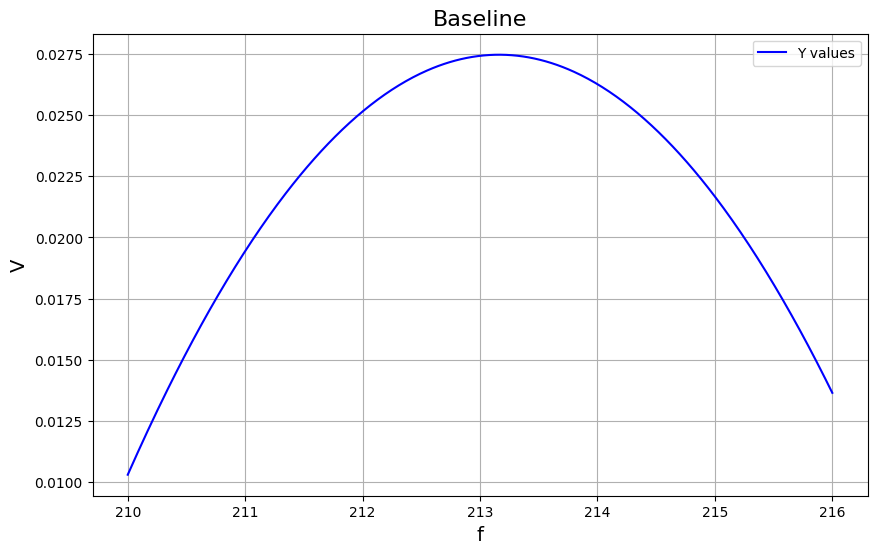

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(x, baseline, linestyle='-', color='b', label='Y values')
plt.title('Baseline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()